In [500]:
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz 
import pandas as pd

iris=load_iris()


In [501]:
#converting a dictionary to a Pandas DataFrame. The dictionary includes the column names and the corresponding data in the 
#iris dataset
data=pd.DataFrame({'sepal length':iris.data[:,0],
                   'sepal width':iris.data[:,1],
                   'petal length':iris.data[:,2],
                   'petal width':iris.data[:,3],
                   'species':iris.target})

In [502]:
from sklearn.model_selection import train_test_split #This function randomizes the data while splitting it
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']

In [503]:
#splitting the date randomly to 25% for test and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [504]:
#gini impurity can be defined as the chance that a sampla data would be misclassified if randomly assigned at this depth of
#the tree.  Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution 
#of elements among various classes.
dtm = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2)
dtm=dtm.fit(X_train,y_train)

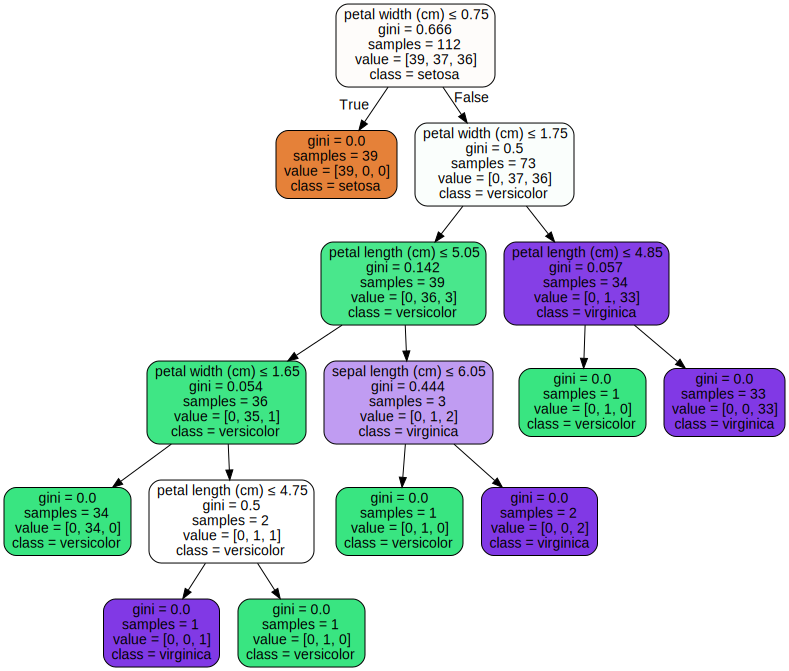

In [505]:
tree_data = tree.export_graphviz(dtm, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(tree_data)  
graph  

In [506]:
#predictions for test data
from sklearn import metrics
import numpy as np
y_test_hat=dtm.predict(X_test)
y_test_hat

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0])

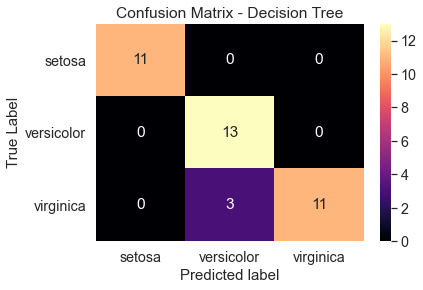

<Figure size 720x504 with 0 Axes>

In [507]:
#Confusion matrix allows us to visualize the performance of the prediction of the algorithm on our given test set.
#On the diagonal we can see the accurate predictions for each species. The other indexes on the table indicates the 
#wrong predictions: the species it predicted and the actual species it belongs to.
#Refrerence: https://en.wikipedia.org/wiki/Confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
con_matrix=metrics.confusion_matrix(y_test, y_test_hat)
matrix_df = pd.DataFrame(con_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

labels=['setosa', 'versicolor', 'virginica']
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [508]:
#accuracy = sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix)
#accuracy defines the rate of successful predictions in the test set.
print("Accuracy score for unseen test data (X_test): ",metrics.accuracy_score(y_test,y_test_hat)*100,'%')

Accuracy score for unseen test data (X_test):  92.10526315789474 %


In [509]:
#precision = True positive (number in diagonal)/All positives (column sum)
#precision defines the rate of successful predictions for a species inside all predictions made for that species. 
#For setosa and virginica precision is 1.0 because all predictions made for them are their real species. On the other hand,
#the algorithm predicted that there are 16 versicolor but only 13 of them are actual versicolor. So the precision for 
#versicolor is 13/16 = 0.8125
#Reference: https://en.wikipedia.org/wiki/Precision_and_recall
precision = metrics.precision_score(y_test, y_test_hat, average=None)

precision_results = pd.DataFrame(precision, index=labels)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results


,precision
setosa,1.0000
versicolor,0.8125
virginica,1.0000


In [510]:
#recall = True positive (number in diagonal)/All assignments (row sum)
#recall defines the rate of successful predictions for a species to the number of flowers of that species
#in the test set. For setosa and versicolor the number of successful predictions are equal to the number of flowers
#belonging to these species in the test set, so the recall value for them aquired 1. For virginica the number of correct
#predictions is 11 and the number of virginica species in the test set is 14, so the recall for virginica is 11/14=0.785714
#Reference: https://en.wikipedia.org/wiki/Precision_and_recall

recall = metrics.recall_score(y_test, y_test_hat, average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
setosa,1.000000
versicolor,1.000000
virginica,0.785714


In [511]:
#f1 = 2 * (precision * recall)/(precision + recall)
#f1 is the harmonic mean of acquired precision and recall values. The 1 in f1 indicates that precision and recall are 
#equally important. A perfect model would give f1 as 1. In other words species having precision and recall values as 1 
#has the f1 = 1. For setosa we had obtained 1 for bot, so we also found 1 for f1 value. Thus, we can say that our decision tree 
#model is perfectly fitting for setosa.
#Reference: https://deepai.org/machine-learning-glossary-and-terms/f-score
f1 = metrics.f1_score(y_test, y_test_hat, average=None)
f1_results = pd.DataFrame(f1, index=labels)

f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
setosa,1.000000
versicolor,0.896552
virginica,0.880000


>1, train: 0.679, test: 0.632
>2, train: 0.964, test: 0.947
>3, train: 0.982, test: 0.921
>4, train: 0.991, test: 0.895
>5, train: 1.000, test: 0.895


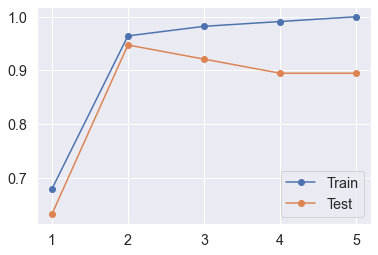

In [512]:
#For this random seperation of training and test data, we can see that there is an overfitting situation. When the depth of
#the Decision Tree increases, the accurate predictions made for the training set data increases inherently and it reaches to 
#100% when the depth of the tree meets to the point where all species are seperated in the tree. However, the same thing 
#doesn't happen for the test set. First, accurate predictions increases until the depth of the tree is 2. But then it begins
#to decrease. This is exactly what we would expect to see in a pattern of overfitting. So we can say that our model is 
#overfitting. (With different random seperations of training and test sets, different results may be obtained though. The 
#important thing is the average outcome. When we try different seperations for this dataset what we generally see is a 
#non-overfitting model. Since our dataset is relatively small, overfitting may not be seen as frequent as it is seen on a 
#larger dataset. Also if the proportion of the training set to the test set was lower or higher, different results may have 
#been obtained)
from matplotlib import pyplot
train_scores, test_scores = list(), list()

values = [i for i in range(1, 6)]

for i in values:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

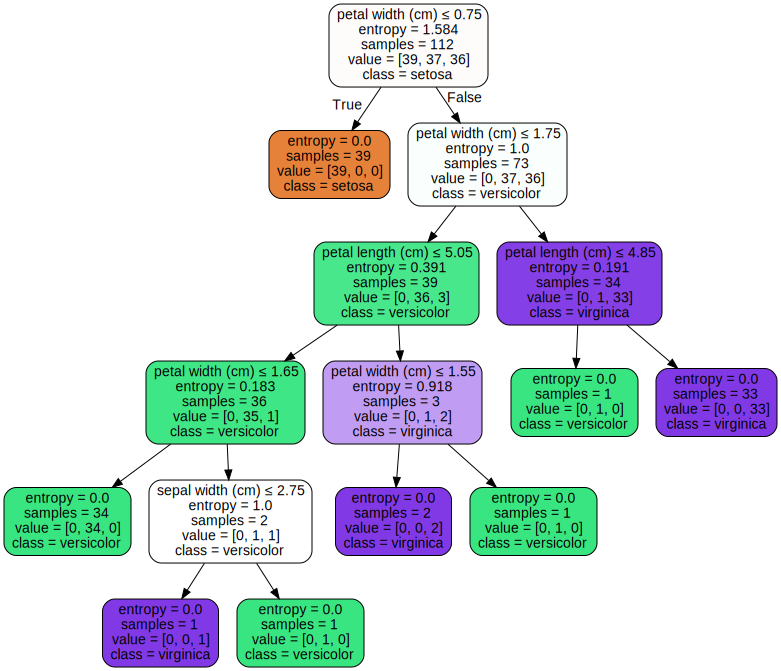

In [513]:
#Entropy can be defined as the unpredictability of a node. We want to split the nodes such that we acquire more predictable 
#nodes. Calculating the weighted averages (loss function) of entropies of various splits and then comparing these averages 
#we can decide which split to choose. The lower the weighted average, the better the choice.

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
clf=clf.fit(X_train,y_train)
tree_data_ent = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(tree_data_ent)  
graph 
#Information gain can be defined as the measure of how much information a feature provides about a class. It helps to determine
#which attribute to choose for a node to split. Information gain for a split can be calculated by substracting the average 
#entropy of the children from the parent node's entropy. It can also be thought as entropy loss. The class that providing
#the highest information gain is chosen for each node.
#Reference: https://www.section.io/engineering-education/entropy-information-gain-machine-learning/

In [514]:
#predictions for the test set
y_test_hat_ent=dtm.predict(X_test)
y_test_hat_ent

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0])

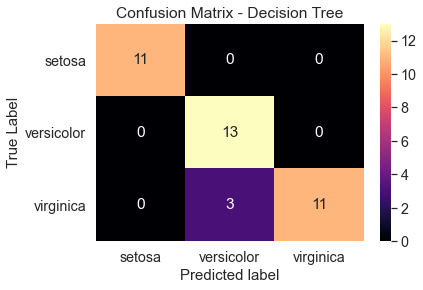

<Figure size 720x504 with 0 Axes>

In [515]:
con_matrix_ent=metrics.confusion_matrix(y_test, y_test_hat_ent)
con_matrix
matrix_df_ent = pd.DataFrame(con_matrix_ent)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_ent, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [516]:
print("Accuracy score for unseen test data (X_test): ",metrics.accuracy_score(y_test,y_test_hat_ent)*100,'%')

Accuracy score for unseen test data (X_test):  92.10526315789474 %


In [517]:
#precision = True positive (number in diagonal)/All positives (column sum)
precision_ent = metrics.precision_score(y_test, y_test_hat_ent, average=None)

precision_results_ent = pd.DataFrame(precision_ent, index=labels)
#rename the results column
precision_results_ent.rename(columns={0:'precision'}, inplace =True)
precision_results_ent


,precision
setosa,1.0000
versicolor,0.8125
virginica,1.0000


In [518]:
#recall = True positive (number in diagonal)/All assignments (row sum)
recall_ent = metrics.recall_score(y_test, y_test_hat_ent, average =None)
recall_results_ent = pd.DataFrame(recall_ent, index= labels)
recall_results_ent.rename(columns ={0:'Recall'}, inplace =True)
recall_results_ent

,Recall
setosa,1.000000
versicolor,1.000000
virginica,0.785714


In [519]:
#f1 = 2 * (precision * recall)/(precision + recall)
f1_ent = metrics.f1_score(y_test, y_test_hat_ent, average=None)
f1_results_ent = pd.DataFrame(f1_ent, index=labels)

f1_results_ent.rename(columns={0:'f1'}, inplace=True)
f1_results_ent

,f1
setosa,1.000000
versicolor,0.896552
virginica,0.880000


>1, train: 0.679, test: 0.632
>2, train: 0.964, test: 0.947
>3, train: 0.982, test: 0.921
>4, train: 0.991, test: 0.895
>5, train: 1.000, test: 0.895


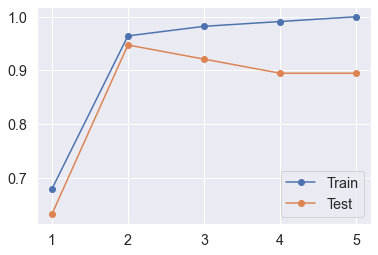

In [520]:
#For this random seperation of training and test data, we can see that there is an overfitting situation. When the depth of
#the Decision Tree increases, the accurate predictions made for the training set data increases inherently and it reaches to 
#100% when the depth of the tree meets to the point where all species are seperated in the tree. However, the same thing 
#doesn't happen for the test set. First, accurate predictions increases until the depth of the tree is 2. But then it begins
#to decrease. This is exactly what we would expect to see in a pattern of overfitting. So we can say that our model is 
#overfitting. (With different random seperations of training and test sets, different results may be obtained though. The 
#important thing is the average outcome. When we try different seperations for this dataset what we generally see is a 
#non-overfitting model. Since our dataset is relatively small, overfitting may not be seen as frequent as it is seen on a 
#larger dataset. Also if the proportion of the training set to the test set was lower or higher, different results may have 
#been obtained)
from matplotlib import pyplot
train_scores, test_scores = list(), list()

values = [i for i in range(1, 6)]

for i in values:
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()